## Libraries and parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
figsize = (5,3)
histogram_bin_count = 20

## Import data & split into years

In [ ]:
# Read the CSV file, specifying the columns to read
df = pd.read_csv('PECDv4.2_NLregion_TA.csv', parse_dates=[1])
df = df.rename(columns={'datetime': 'Date'})

# Remove first column that only has row number
df = df.iloc[: , 1:]

# Split the dataframe by year
df['Year'] = df['Date'].dt.year
dfs_by_year = {year: data for year, data in df.groupby('Year')}

## Process data

Turn dataframe into dictionaries. Obtain daily/monthly/yearly average temperature

In [ ]:
# Create an empty dataframe to store the results
hourly_tmp_df = {}
avg_daily_temp_df = {}
min_daily_temp_df = {}
max_daily_temp_df = {}
avg_yearly_temp = {}
avg_monthly_temp_df = {}

for colname in df.columns[1:-1]:
    _, ssp, model = colname.split("_")

    # Iterate through each year's dataframe
    for year, data in dfs_by_year.items():
        cy_id = "{}_{}_{}".format(year, model, ssp)
        data = data[['Date', colname]]
        # Resample the data to daily frequency and calculate the mean temperature for each day
        daily_avg = data.resample('D', on='Date').mean()
        monthly_avg = data.resample('ME', on='Date').mean()
        daily_min = data.resample('D', on='Date').min()
        daily_max = data.resample('D', on='Date').max()
        # Append the results to the avg_daily_temp_df
        hourly_tmp_df[cy_id] = data[colname]
        avg_daily_temp_df[cy_id] = daily_avg[colname]
        avg_yearly_temp[cy_id] = daily_avg[colname].mean()
        avg_monthly_temp_df[cy_id] = monthly_avg[colname]
        min_daily_temp_df[cy_id] = daily_min[colname]
        max_daily_temp_df[cy_id] = daily_max[colname]

## Few examples

### Auxiliary functions and variables

In [ ]:
features_set = {}

In [ ]:
def plot_histograms(data,bins=10,color=None,edgecolor=None,linewidth=None,alpha=None,figsize=(10,6),title=None,xlabel=None,ylabel=None):
    plt.figure(figsize=figsize)
    plt.hist(data,bins=bins,color=color,edgecolor=edgecolor,linewidth=linewidth,alpha=alpha)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
def plot_lines(xdata,ydata,color=None,linewidth=None,alpha=None,figsize=(10,6),title=None,xlabel=None,ylabel=None,label=None):
    plt.figure(figsize=figsize)
    if label is None:
        islegend = False
    else:
        islegend = True
    if len(np.shape(xdata)) == 1:
        plt.plot(xdata,ydata,color=color,linewidth=linewidth,alpha=alpha)
    elif len(np.shape(xdata)) == 2:
        if color is None:
            color = [None]*len(xdata)
        if label is None:
            label = [None]*len(xdata)
        if linewidth is None:
            linewidth = [None]*len(xdata)
        if alpha is None:
            alpha = [None]*len(xdata)
        for i in range(len(xdata)):
            plt.plot(xdata[i],ydata[i],color=color[i],linewidth=linewidth[i],alpha=alpha[i],label=label[i])
    else:
        raise ValueError('xdata must have dimension of 1 or 2')
    plt.title(title)
    if islegend:
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [ ]:
def extract_value_1_moodel(data):
    return np.array(list(data.values())[:86])

In [ ]:
def extract_year_1_model(data):
    return np.array([int(id[:4]) for id in list(data.keys())[:86]])

### Number of days with certain tempterature above or below average

Find number of days per year above and below temperature theshold

In [ ]:
count_days_above_temp = {}
count_days_below_temp = {}

for temp in range(-11,41):
    count_days_above_temp[temp] = {year: (data > temp if not np.any(np.isnan(data)) else np.array(np.nan)).sum() for year, data in avg_daily_temp_df.items()}
    count_days_below_temp[temp] = {year: (data < temp if not np.any(np.isnan(data)) else np.array(np.nan)).sum() for year, data in avg_daily_temp_df.items()}

Build histograms

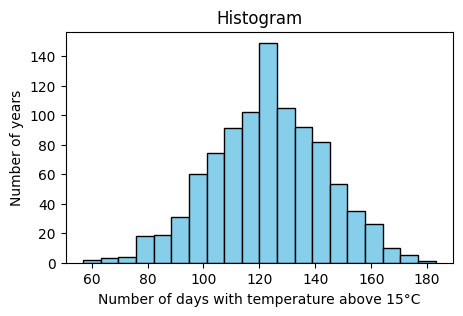

In [ ]:
temp_above = 18

# Extract years and counts from the dictionary
years = list(count_days_above_temp[temp_above].keys())
counts = list(count_days_above_temp[temp_above].values())

features_set['Days above '+str(temp_above)] = count_days_above_temp[temp_above]

# Create the histogram
plt.figure(figsize=figsize)
plt.hist(counts, bins=histogram_bin_count, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel(f'Number of days with temperature above {temp_above}°C')
plt.ylabel('Number of years')
plt.show()

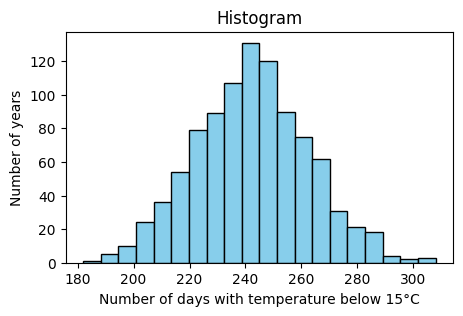

In [ ]:
temp_below = 15

# Extract years and counts from the dictionary
years = list(count_days_below_temp[temp_below].keys())
counts = list(count_days_below_temp[temp_below].values())

features_set['Days below '+str(temp_below)] = count_days_below_temp[temp_below]

# Create the histogram
plt.figure(figsize=figsize)
plt.hist(counts, bins=histogram_bin_count, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel(f'Number of days with temperature below {temp_below}°C')
plt.ylabel('Number of years')
plt.show()

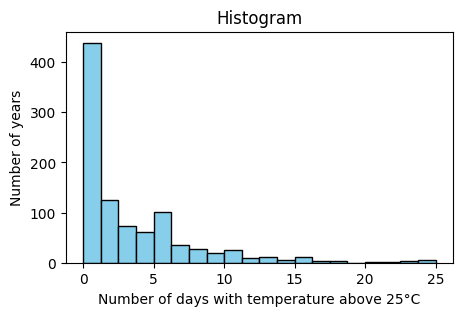

In [ ]:
temp_above = 25

# Extract years and counts from the dictionary
years = list(count_days_above_temp[temp_above].keys())
counts = list(count_days_above_temp[temp_above].values())

features_set['Days above '+str(temp_above)] = count_days_above_temp[temp_above]

# Create the histogram
plot_histograms(counts,bins=histogram_bin_count,color='skyblue',edgecolor='black',figsize=figsize,title='Histogram',xlabel=f'Number of days with temperature above {temp_above}°C',ylabel='Number of years')

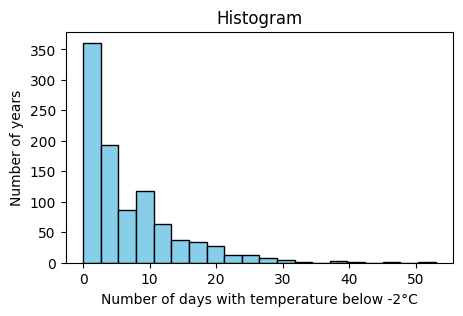

In [ ]:
temp_below = -2

# Extract years and counts from the dictionary
years = list(count_days_below_temp[temp_below].keys())
counts = list(count_days_below_temp[temp_below].values())

features_set['Days below '+str(temp_below)] = count_days_below_temp[temp_below]

# Create the histogram
plt.figure(figsize=figsize)
plt.hist(counts, bins=histogram_bin_count, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel(f'Number of days with temperature below {temp_below}°C')
plt.ylabel('Number of years')
plt.show()

### Number of days with temperature any or max/min temperature below/above certain temperatures

Find number of days per year above and below temperature theshold

In [ ]:
count_days_1_temp_above = {}
count_days_max_temp_below = {}

for temp in range(10,20):
    count_days_1_temp_above[temp] = {year: (data > temp if not np.any(np.isnan(data)) else np.array(np.nan)).sum() for year, data in max_daily_temp_df.items()}
    count_days_max_temp_below[temp] = {year: (data < temp if not np.any(np.isnan(data)) else np.array(np.nan)).sum() for year, data in max_daily_temp_df.items()}

Build histograms

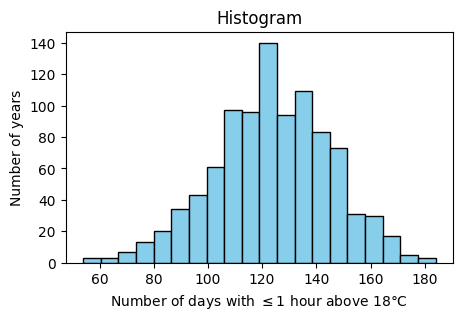

In [ ]:
temp_above = 18

# Extract years and counts from the dictionary
years = list(count_days_1_temp_above[temp_above].keys())
counts = list(count_days_1_temp_above[temp_above].values())

features_set['Days with $\\geq 1$ hour above '+str(temp_above)] = count_days_1_temp_above[temp_above]

# Create the histogram
plt.figure(figsize=figsize)
plt.hist(counts, bins=histogram_bin_count, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel(f'Number of days with $\\geq 1$ hour above {temp_above}°C')
plt.ylabel('Number of years')
plt.show()

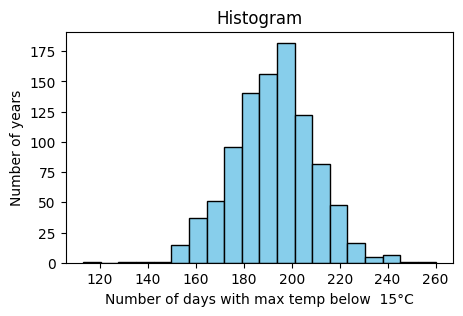

In [ ]:
temp_below = 15

# Extract years and counts from the dictionary
years = list(count_days_max_temp_below[temp_below].keys())
counts = list(count_days_max_temp_below[temp_below].values())

features_set['Days below with max temp below '+str(temp_below)] = count_days_max_temp_below[temp_below]

# Create the histogram
plt.figure(figsize=figsize)
plt.hist(counts, bins=histogram_bin_count, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel(f'Number of days with max temp below  {temp_below}°C')
plt.ylabel('Number of years')
plt.show()

### Averaged temperature distance from 15C

See https://www.imf.org/-/media/Files/Publications/WP/2021/English/wpiea2021022-print-pdf.ashx for a relation between temperature distance and power consumption

##### daily

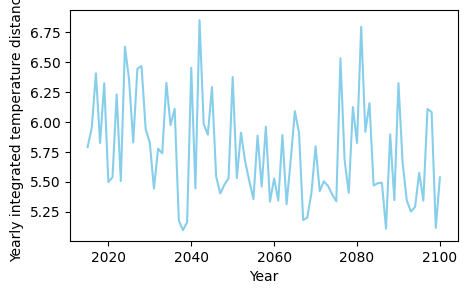

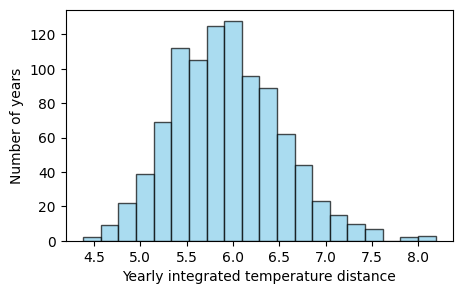

In [ ]:
reference_temp = 15
yearly_integrated_temperature_distance_day = {year: (abs(data - reference_temp).sum() if not np.any(np.isnan(data)) else np.nan)/365 for year, data in avg_daily_temp_df.items()}

plot_lines(extract_year_1_model(yearly_integrated_temperature_distance_day),extract_value_1_moodel(yearly_integrated_temperature_distance_day),color='skyblue',figsize=(5,3),
                title=None,#'Yearly integrated temperature distance (temperature averaged over a day)',
                xlabel='Year',ylabel='Yearly integrated temperature distance')

plot_histograms(yearly_integrated_temperature_distance_day.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of yearly integrated temperature distance (temperature averaged over a day)',
                xlabel='Yearly integrated temperature distance',ylabel='Number of years')

##### hourly

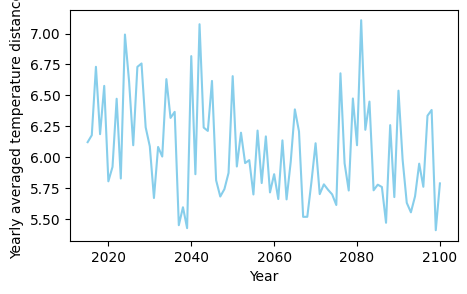

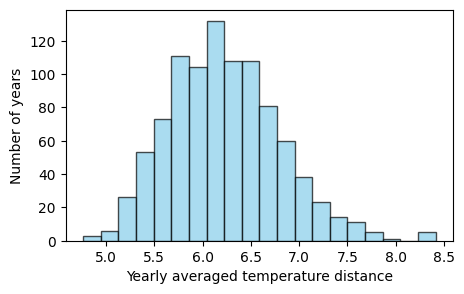

In [ ]:
reference_temp = 15
yearly_integrated_temperature_distance = {year: (abs(data - reference_temp).sum() if not np.any(np.isnan(data)) else np.nan)/(365*24) for year, data in hourly_tmp_df.items()}
features_set["Averaged temperature distance"] = yearly_integrated_temperature_distance

plot_lines(extract_year_1_model(yearly_integrated_temperature_distance),extract_value_1_moodel(yearly_integrated_temperature_distance),color='skyblue',figsize=(5,3),
                title=None,#'Yearly integrated temperature distance (temperature averaged over a day',
                xlabel='Year',ylabel='Yearly averaged temperature distance')

plot_histograms(yearly_integrated_temperature_distance.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of yearly integrated temperature distance',
                xlabel='Yearly averaged temperature distance',ylabel='Number of years')

averaged temp difference above or below

In [ ]:
def compute_HDD(data,base_temp):
    return np.heaviside(base_temp - data, 0)*abs(data-base_temp) if not np.any(np.isnan(data)) else np.array(np.nan)

def compute_CDD(data,base_temp):
    return np.heaviside(data - base_temp, 0)*abs(data-base_temp) if not np.any(np.isnan(data)) else np.array(np.nan)

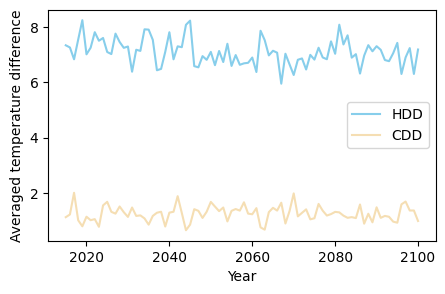

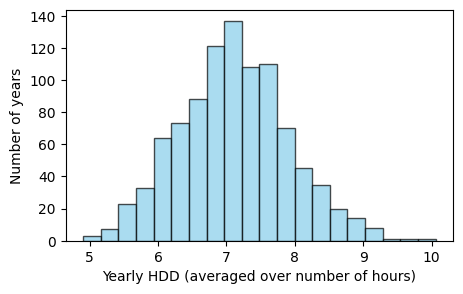

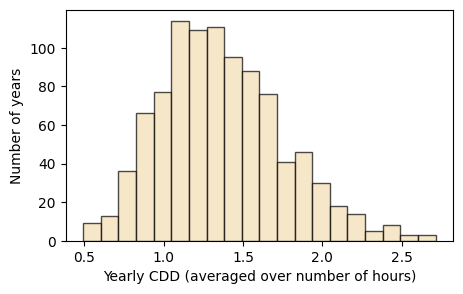

In [ ]:
hot_reference_temp = 18
cold_reference_temp = 15
yearly_HDD = {year: compute_HDD(data,hot_reference_temp).sum()/(365*24) for year, data in hourly_tmp_df.items()}
yearly_CDD = {year: compute_CDD(data,cold_reference_temp).sum()/(365*24) for year, data in hourly_tmp_df.items()}
features_set["Averaged temp difference above "+str(hot_reference_temp)] = yearly_HDD
features_set["Averaged temp difference below "+str(cold_reference_temp)] = yearly_CDD

plot_lines([extract_year_1_model(yearly_HDD),extract_year_1_model(yearly_CDD)],[extract_value_1_moodel(yearly_HDD),extract_value_1_moodel(yearly_CDD)],color=['skyblue','wheat'],figsize=(5,3),
                label=['above '+str(hot_reference_temp),'below '+str(cold_reference_temp)],title=None,#'Yearly HDD',
                xlabel='Year',ylabel='Averaged temperature difference')

plot_histograms(yearly_HDD.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of yearly integrated temperature distance',
                xlabel="Averaged temp difference above "+str(hot_reference_temp),ylabel='Number of years')

plot_histograms(yearly_CDD.values(),bins=histogram_bin_count,color='wheat',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of yearly integrated temperature distance',
                xlabel="Averaged temp difference below "+str(cold_reference_temp),ylabel='Number of years')

### Temperatures variation in a year

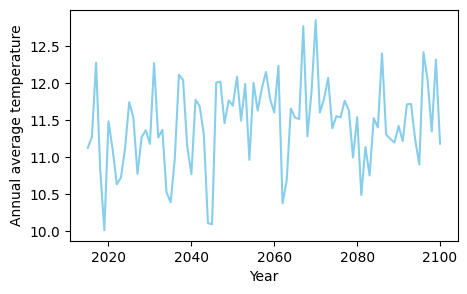

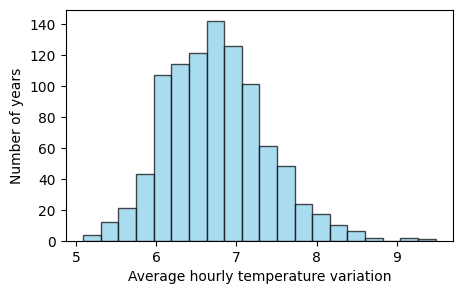

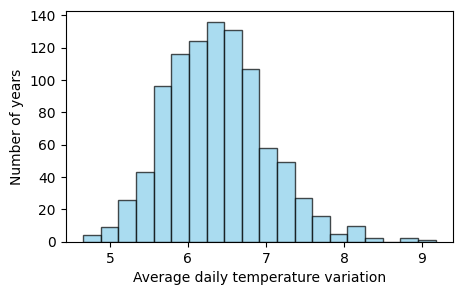

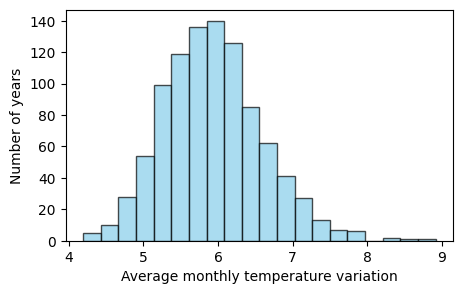

In [ ]:
average_hourly_temperature_variation = {year: data.std() for year, data in hourly_tmp_df.items()}
yearly_mean_temperature = {year: data.mean() for year, data in hourly_tmp_df.items()}
average_daily_temperature_variation = {year: data.std() for year, data in avg_daily_temp_df.items()}
average_monthly_temperature_variation = {year: data.std() for year, data in avg_monthly_temp_df.items()}

features_set["Hourly temperature variation"] = average_hourly_temperature_variation
features_set["Annual average temperature"] = yearly_mean_temperature
features_set["Daily temperature variation"] = average_daily_temperature_variation
features_set["Monthly temperature variation"] = average_monthly_temperature_variation

plot_lines(extract_year_1_model(yearly_mean_temperature),extract_value_1_moodel(yearly_mean_temperature),color='skyblue',figsize=(5,3),
                title=None,#'Annual average temperature',
                xlabel='Year',ylabel='Annual average temperature')

plot_histograms(average_hourly_temperature_variation.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of average hourly temperature variation',
                xlabel='Average hourly temperature variation',ylabel='Number of years')

plot_histograms(average_daily_temperature_variation.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of average daily temperature variation',
                xlabel='Average daily temperature variation',ylabel='Number of years')

plot_histograms(average_monthly_temperature_variation.values(),bins=histogram_bin_count,color='skyblue',edgecolor='black',linewidth=1,alpha=0.7,figsize=(5,3),
                title=None,#'Histogram of average monthly temperature variation',
                xlabel='Average monthly temperature variation',ylabel='Number of years')

### Hottest and coldest temperature of the year. Largest and smallest daily temperature fluctuation

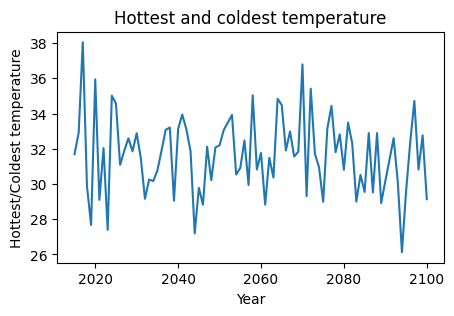

In [ ]:
hottest_temp = {}
coldest_temp = {}

for year, data in hourly_tmp_df.items():
    hottest_temp[year] = data.max()
    coldest_temp[year] = data.min()

features_set["Hottest temperature"] = hottest_temp
features_set["Coldest temperature"] = coldest_temp

plot_lines(extract_year_1_model(hottest_temp),extract_value_1_moodel(hottest_temp),figsize=(5,3),
                title='Hottest and coldest temperature',
                xlabel='Year',ylabel='Hottest/Coldest temperature')


### Longest extreme heat streak and longest extreme cold streak

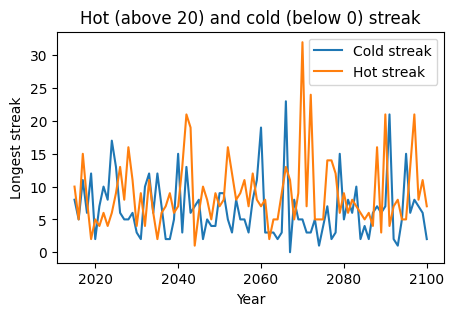

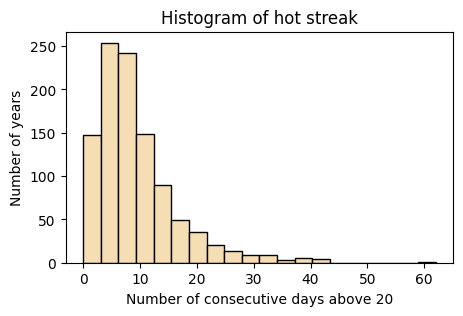

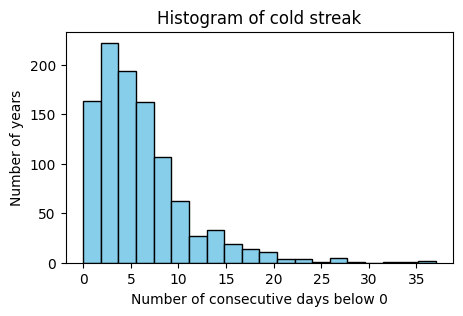

In [ ]:
heat_streak = {}
cold_streak = {}
reference_cold_temp = 0
reference_hot_temp = 20

for year, data in avg_daily_temp_df.items():
    # Check if the temperature is above or below a threshold
    hot_data = data > reference_hot_temp
    cold_data = data < reference_cold_temp

    # Find the longest streak of days with temperature above the threshold
    heat_streak[year] = hot_data.astype(int).groupby(hot_data.ne(hot_data.shift()).cumsum()).cumsum().max()
    cold_streak[year] = cold_data.astype(int).groupby(cold_data.ne(cold_data.shift()).cumsum()).cumsum().max()

features_set["# consecutive days above "+str(reference_hot_temp)] = heat_streak
features_set["# consecutive days below "+str(reference_cold_temp)] = cold_streak

plot_lines([extract_year_1_model(cold_streak),extract_year_1_model(heat_streak)],[extract_value_1_moodel(cold_streak),extract_value_1_moodel(heat_streak)],figsize=(5,3),
                title='Hot (above '+str(reference_hot_temp)+') and cold (below '+str(reference_cold_temp)+') streak',label=['Cold streak','Hot streak'],
                xlabel='Year',ylabel='Longest streak')

plot_histograms(heat_streak.values(),bins=histogram_bin_count,color='wheat',figsize=(5,3),edgecolor='black',
                title='Histogram of hot streak',
                xlabel='Number of consecutive days above '+str(reference_hot_temp),ylabel='Number of years')

plot_histograms(cold_streak.values(),bins=histogram_bin_count,color='skyblue',figsize=(5,3),edgecolor='black',
                title='Histogram of cold streak',
                xlabel='Number of consecutive days below '+str(reference_cold_temp),ylabel='Number of years')

### Correlations among features

List of features:
Days above 25
Days below 15
Days below -2
Integrated temperature distance
HDD
CDD
Annual average temperature
Monthly temperature variation
Hottest temperature
Coldest temperature
# consecutive days above 20
# consecutive days below 0
Averaged temperature distance


NameError: name 'ras' is not defined

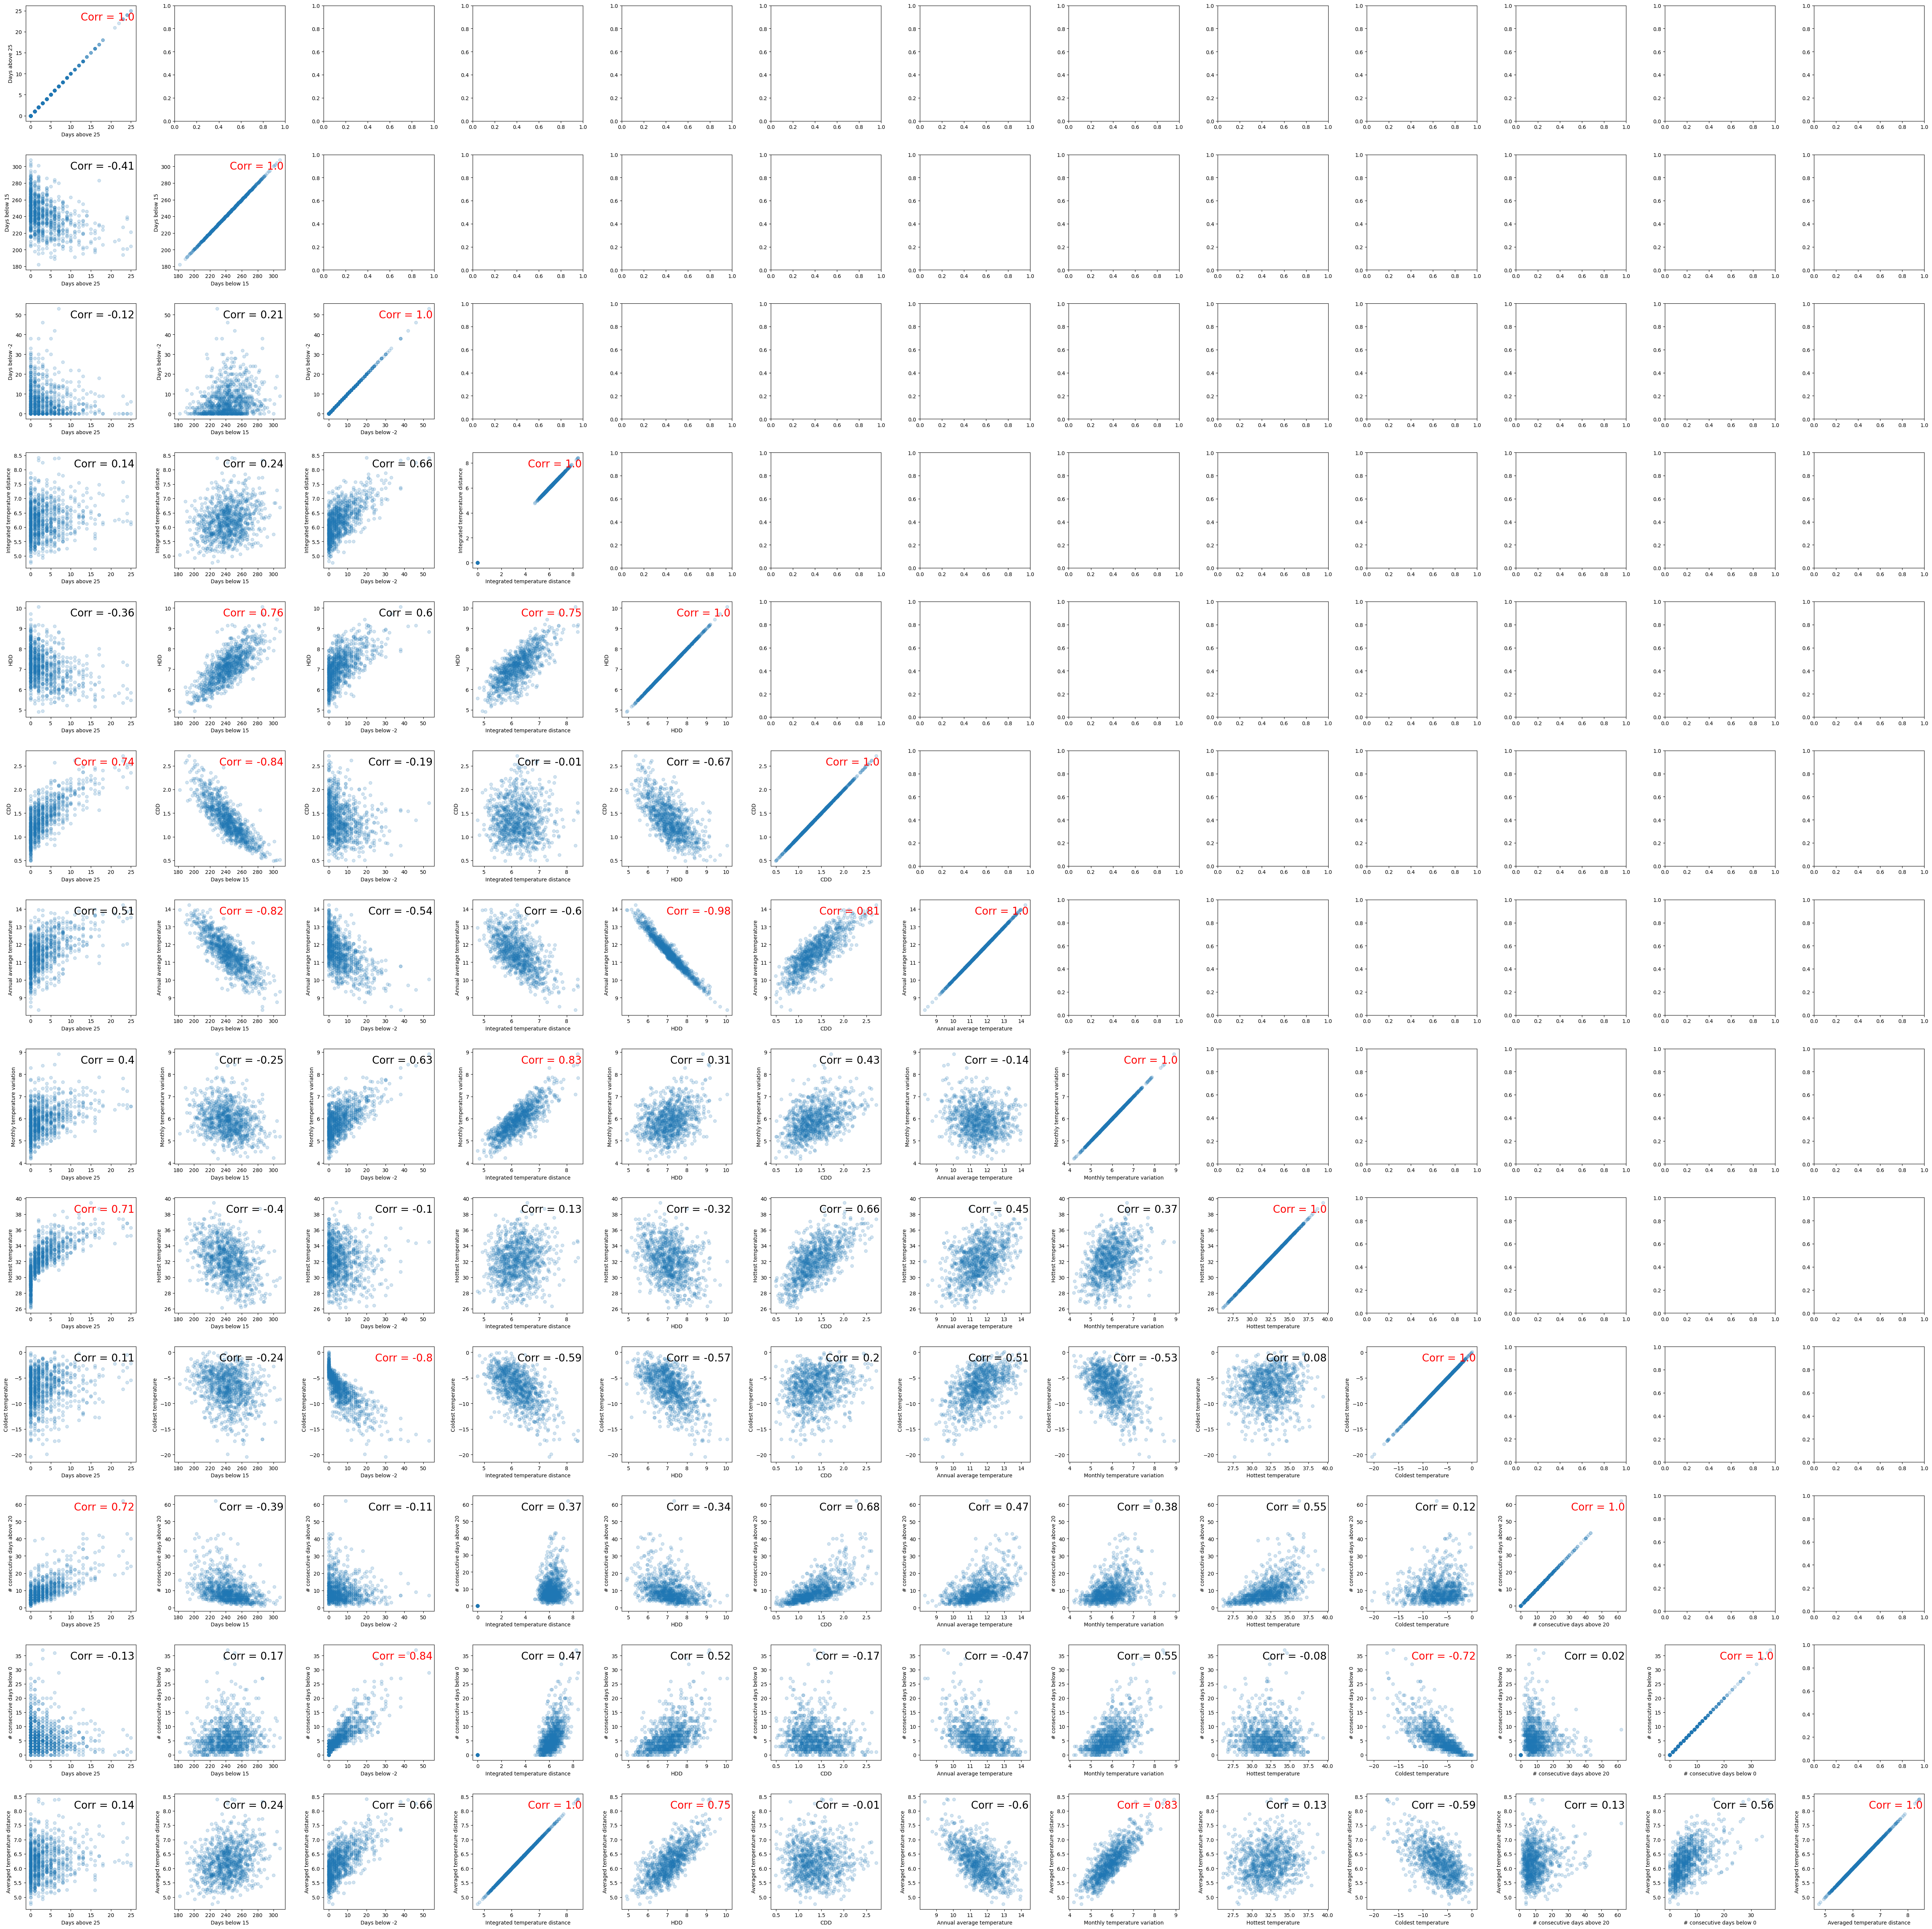

In [ ]:
count_features = len(features_set)
print("List of features:")
for feature_name in features_set.keys():
    print(feature_name)

fig, axes = plt.subplots(count_features, count_features, figsize=(4*count_features, 4*count_features))

for id1,(feature1_name, feature1_data) in enumerate(features_set.items()):
    for id2,(feature2_name, feature2_data) in enumerate(features_set.items()):
        if id1 < id2:
            continue
        ax = axes[id1, id2]
        data1 = np.array(list(feature1_data.values()))
        data2 = np.array(list(feature2_data.values()))
        # remove nan if it appears in either data1 or data2
        mask = ~np.isnan(data1) & ~np.isnan(data2)
        data1 = data1[mask]
        data2 = data2[mask]
        ax.scatter(data2,data1,alpha=0.2)
        # ax.set_title(f'{feature1_name} vs {feature2_name}')
        # ax.legend()
        correlation = round(stats.pearsonr(data2,data1)[0],2)
        if abs(correlation) > 0.7:
            ax.annotate("Corr = "+str(correlation), xy=(210, 210), xycoords='axes points',
                size=20, ha='right', va='top',color='red')
        else:
            ax.annotate("Corr = "+str(correlation), xy=(210, 210), xycoords='axes points',
                size=20, ha='right', va='top')
        ax.set_xlabel(feature2_name)
        ax.set_ylabel(feature1_name)

plt.tight_layout()
plt.savefig('features_correlation.pdf')
plt.show()

## Export

In [ ]:
df_out = pd.DataFrame({'cy_id':[str(year) for year in yearly_mean_temperature.keys()],'Annual average temperature': yearly_mean_temperature.values(), 'Integrated temperature distance': yearly_integrated_temperature_distance.values()})
df_out.to_csv('PECDc4.2_NLregion_TAfeatures.csv',index=False)